# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [8]:
%matplotlib inline

import matplotlib.pyplot as plt, seaborn as sns
import numpy as np
import pandas as pd

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [75]:
customers = pd.read_csv('../Wholesale customers data.csv')
customers.shape

(440, 8)

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [76]:
display(customers.head())
print(customers.Channel.unique())
print(customers.Region.unique())

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


[2 1]
[3 1 2]


In [77]:
display(customers.dtypes)
customers.describe()

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


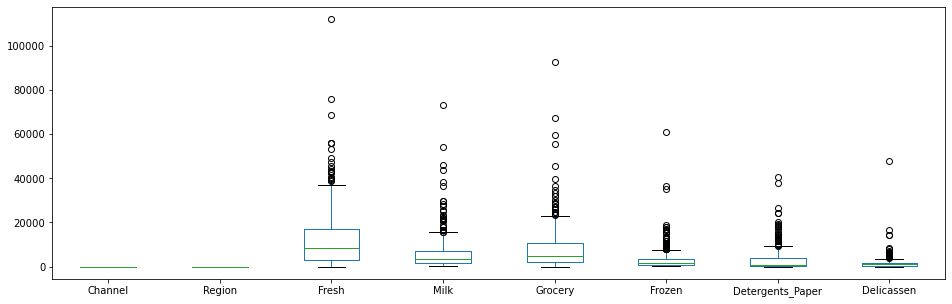

In [78]:
customers.plot(kind='box', figsize = (16, 5));

In [79]:
customers.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

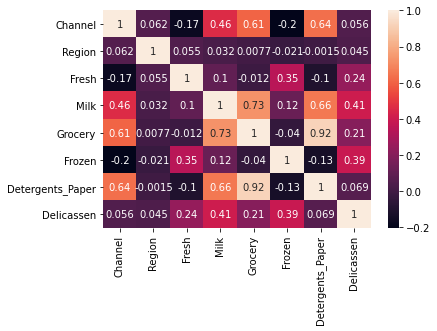

In [80]:
sns.heatmap(customers.corr(), annot = True);

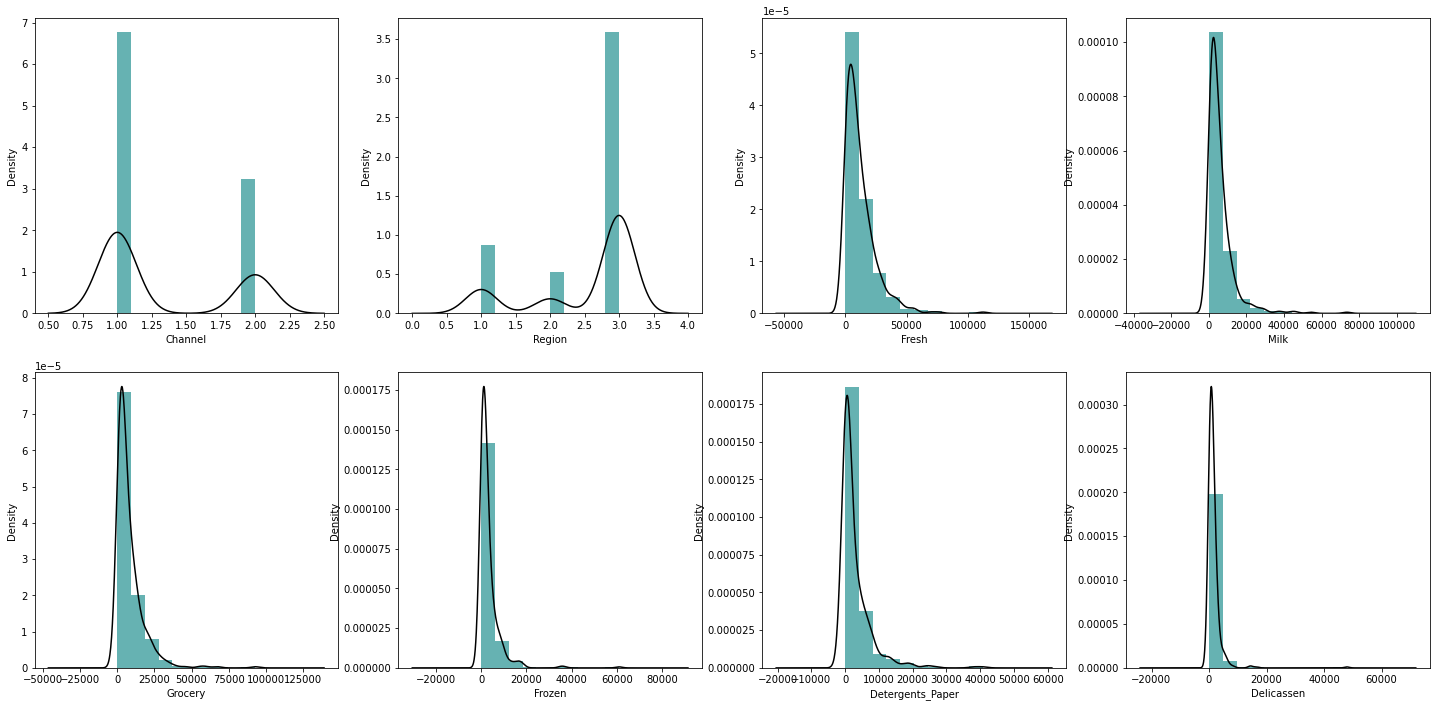

In [81]:
plt.figure(figsize=(25,25))
for i in range(len(customers.columns)):
    plt.subplot(4,4, i+1)
    plt.grid(False)
    customers[customers.columns[i]].hist(density=True, stacked = True, color='teal', alpha=0.6)
    customers[customers.columns[i]].plot(kind='density', color='k')
    plt.xlabel(customers.columns[i])

+ What does each column mean?

__`Looks like Channel and Region are categorical variables indicating the location and distribution channel. Fresh, Milk, Grocery, Frozen, Detergents_Paper and Delicassen columns indicate the customer spent in a category`__
+ Any categorical data to convert?

__`Channel and Region are already categorical`__
+ Any missing data to remove?

__`No`__
+ Column collinearity - any high correlations?

__`There is a high correlation between Detergents_Paper and Grocery (92%)`__
+ Descriptive statistics - any outliers to remove?

__`There are a lot of outliers in Fresh, Milk, Grocery, Frozen, Detergents_Paper and Delicassen columns. The values of the outliers are very high.`__
+ Column-wise data distribution - is the distribution skewed?

__`The distribution on each column does not look skewed`__

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [82]:
customers2 = customers.copy()

In [83]:
for i in range(2,len(customers2.columns)):
    q1 = customers2[customers2.columns[i]].quantile(0.25)
    q3 = customers2[customers2.columns[i]].quantile(0.75)
    iqr = q3 - q1
    cutoff = iqr * 1.5; lower = q1 - cutoff; upper = q3 + cutoff
    customers2 = customers2[(customers2[customers2.columns[i]] < upper)]

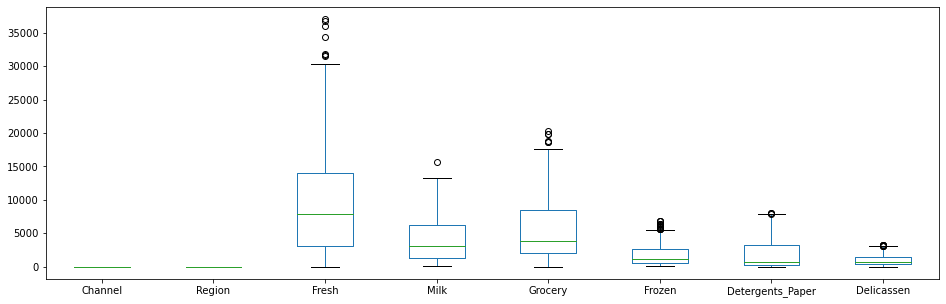

In [84]:
customers2.plot(kind='box', figsize = (16, 5));

In [85]:
customers2.reset_index(drop=True, inplace=True)

In [87]:
display(customers2.shape)
customers2.head()

(318, 8)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,1,3,13265,1196,4221,6404,507,1788
3,2,3,9413,8259,5126,666,1795,1451
4,2,3,12126,3199,6975,480,3140,545


__`I only removed outliers higher than quantile 3 (considered as 75%) on each column and I will keep the remaning outliers because they are a lot and it can highly affect the data as these values indicate customer spends`__

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [96]:
from sklearn.preprocessing import StandardScaler

sscaler = StandardScaler()
customers_ss = sscaler.fit_transform(customers2)
customers_ss = pd.DataFrame(customers_ss, columns = customers.columns)
customers_ss['Channel'] = customers2['Channel']
customers_ss['Region'] = customers2['Region']
customers_ss.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,0.360420,1.740710,0.432714,-0.984801,0.378277,0.451178
1,2,3,-0.325039,1.788015,0.867526,-0.023386,0.659241,1.009718
2,1,3,0.433216,-0.857996,-0.290889,2.859618,-0.605321,1.025020
3,2,3,-0.037274,1.311586,-0.094823,-0.704078,-0.020699,0.595276
4,2,3,0.294097,-0.242723,0.305758,-0.819597,0.589794,-0.560060


# Challenge 3 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [99]:
from sklearn.cluster import KMeans
distortions = []
K = range(1, 10)
for k in K:
    kmeanModel = KMeans(n_clusters = k).fit(customers_ss)
    distortions.append(kmeanModel.inertia_)

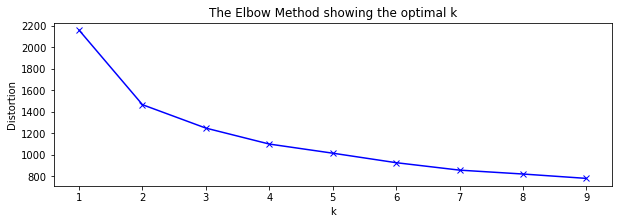

In [102]:
plt.figure(figsize=(10,3))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k'); plt.ylabel('Distortion'); plt.title('The Elbow Method showing the optimal k')
plt.show();

In [103]:
customers_km = KMeans(n_clusters = 4).fit(customers_ss)

Count the values in `labels`.

In [107]:
customers_ss['KM_labels'] = customers_km.labels_
customers_ss['KM_labels'].value_counts()

0    135
2     79
3     63
1     41
Name: KM_labels, dtype: int64

# Challenge 4 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [113]:
customers3 = customers_ss.copy()
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5).fit(customers3)
customers3['DB_labels'] = dbscan.labels_

Count the values in `labels_DBSCAN`.

In [114]:
customers3['DB_labels'].value_counts()

-1    298
 1     13
 0      7
Name: DB_labels, dtype: int64

# Challenge 5 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

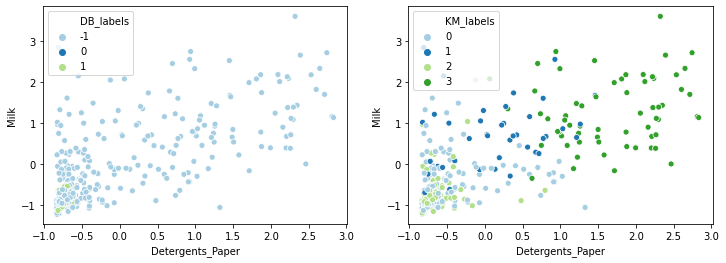

In [143]:
fig, ax = plt.subplots(figsize=(12,4), nrows=1, ncols=2)

plt.sca(ax[0])
sns.scatterplot(data=customers3, x='Detergents_Paper', y='Milk', hue='DB_labels', palette='Paired')

plt.sca(ax[1])
sns.scatterplot(data=customers3, x='Detergents_Paper', y='Milk', hue='KM_labels', palette='Paired')
plt.show();

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

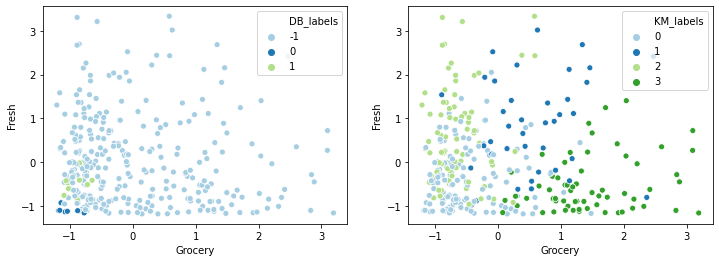

In [134]:
fig, ax = plt.subplots(figsize=(12,4), nrows=1, ncols=2)

plt.sca(ax[0])
sns.scatterplot(data=customers3, x='Grocery', y='Fresh', hue='DB_labels', palette='Paired')

plt.sca(ax[1])
sns.scatterplot(data=customers3, x='Grocery', y='Fresh', hue='KM_labels', palette='Paired')
plt.show();

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

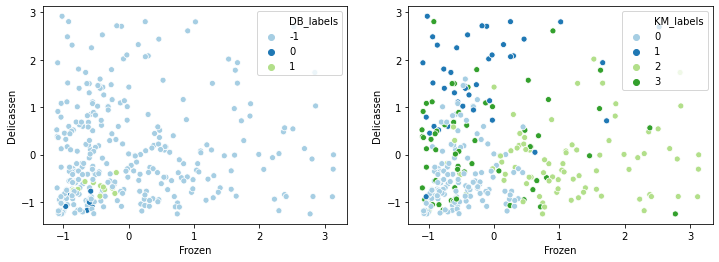

In [141]:
fig, ax = plt.subplots(figsize=(12,4), nrows=1, ncols=2)

plt.sca(ax[0])
sns.scatterplot(data=customers3, x='Frozen', y='Delicassen', hue='DB_labels', palette='Paired')

plt.sca(ax[1])
sns.scatterplot(data=customers3, x='Frozen', y='Delicassen', hue='KM_labels', palette='Paired')
plt.show();

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [137]:
customers3.groupby(['DB_labels']).mean()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,KM_labels
DB_labels,,,,,,,,,
-1,1.288591,2.530201,0.043900,0.060788,0.061424,0.039232,0.050729,0.054260,1.302013
0,1.000000,3.000000,-1.097882,-1.029970,-1.031823,-0.760418,-0.799330,-1.033889,0.000000
1,1.000000,3.000000,-0.415152,-0.838856,-0.852439,-0.489857,-0.732447,-0.687090,0.000000


In [139]:
customers3.groupby(['KM_labels']).mean()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,DB_labels
KM_labels,,,,,,,,,
0,1.081481,2.570370,-0.371759,-0.430202,-0.480072,-0.515217,-0.453040,-0.477729,-0.755556
1,1.487805,2.707317,0.842075,0.727405,0.555210,-0.217023,0.121803,1.589283,-1.000000
2,1.012658,2.367089,0.621876,-0.666757,-0.645434,1.185136,-0.625195,-0.117450,-1.000000
3,1.857143,2.682540,-0.531203,1.284564,1.476752,-0.240849,1.675505,0.136688,-1.000000


Which algorithm appears to perform better?

__`Is not clear which algorithm performed better, but may be KMeans performed better as I selected the number of clusters to obtain`__

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

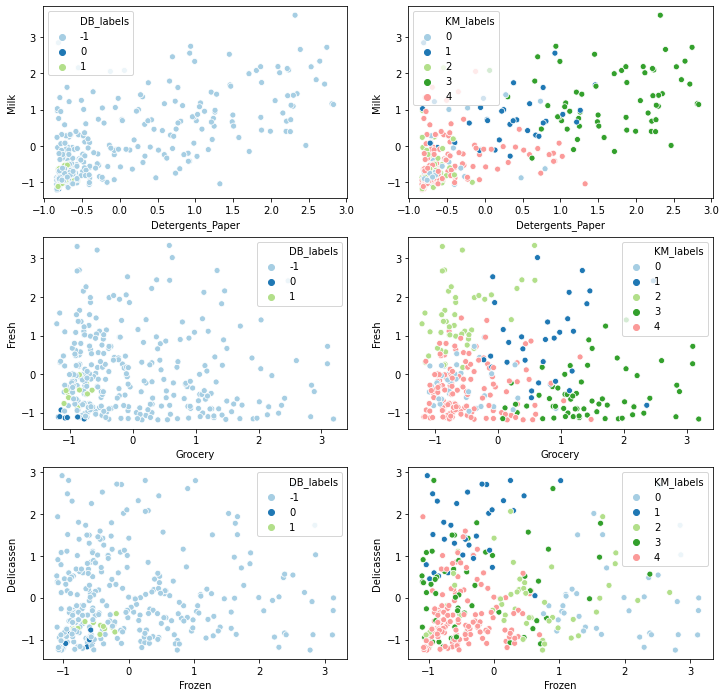

In [155]:
customers_km = KMeans(n_clusters = 5).fit(customers_ss)
customers3['KM_labels'] = customers_km.labels_

fig, ax = plt.subplots(figsize=(12,12), nrows=3, ncols=2)

plt.sca(ax[0][0])
sns.scatterplot(data=customers3, x='Detergents_Paper', y='Milk', hue='DB_labels', palette='Paired')
plt.sca(ax[0][1])
sns.scatterplot(data=customers3, x='Detergents_Paper', y='Milk', hue='KM_labels', palette='Paired')
plt.sca(ax[1][0])
sns.scatterplot(data=customers3, x='Grocery', y='Fresh', hue='DB_labels', palette='Paired')
plt.sca(ax[1][1])
sns.scatterplot(data=customers3, x='Grocery', y='Fresh', hue='KM_labels', palette='Paired')
plt.sca(ax[2][0])
sns.scatterplot(data=customers3, x='Frozen', y='Delicassen', hue='DB_labels', palette='Paired')
plt.sca(ax[2][1])
sns.scatterplot(data=customers3, x='Frozen', y='Delicassen', hue='KM_labels', palette='Paired')
plt.show();

__`With 5 clusters a little diferentiation between clusters is visible, may be it performs better and can start to look for some meaningful insigts`__

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

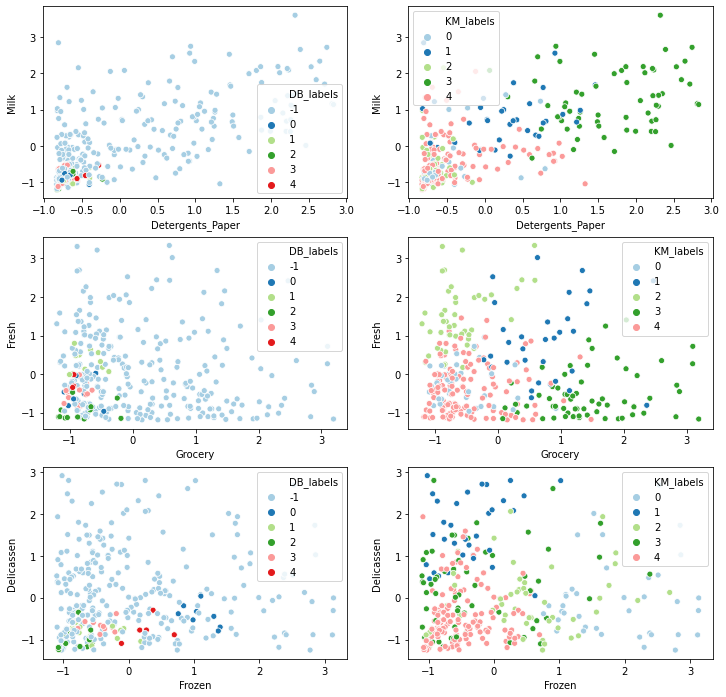

In [176]:
dbscan = DBSCAN(eps=0.75, min_samples=8).fit(customers3)
customers3['DB_labels'] = dbscan.labels_

fig, ax = plt.subplots(figsize=(12,12), nrows=3, ncols=2)

plt.sca(ax[0][0])
sns.scatterplot(data=customers3, x='Detergents_Paper', y='Milk', hue='DB_labels', palette='Paired')
plt.sca(ax[0][1])
sns.scatterplot(data=customers3, x='Detergents_Paper', y='Milk', hue='KM_labels', palette='Paired')
plt.sca(ax[1][0])
sns.scatterplot(data=customers3, x='Grocery', y='Fresh', hue='DB_labels', palette='Paired')
plt.sca(ax[1][1])
sns.scatterplot(data=customers3, x='Grocery', y='Fresh', hue='KM_labels', palette='Paired')
plt.sca(ax[2][0])
sns.scatterplot(data=customers3, x='Frozen', y='Delicassen', hue='DB_labels', palette='Paired')
plt.sca(ax[2][1])
sns.scatterplot(data=customers3, x='Frozen', y='Delicassen', hue='KM_labels', palette='Paired')
plt.show();

__`The number of samples can increase or decreas setting the min_samples in combination with eps but the results of the clusterization are not very clear to do something with it`__